
# P2I7: Mini Projet 1 - Gaz Parfaits - Code D - Piston


## Prénom Nom - Groupe - Date :

16/03/2023 SAMAIN Luc G93 G274


## Compression par un piston

Cette dernière section consiste à appliquer un déplacement à l'un des murs de la boîte (par exemple ici le mur supérieur) au cours de la simulation, et à observer l'évolution de la température et de la pression dans la boîte au cours de ce déplacement. On s'appuie bien sûr sur le code de la section précédente. La modification principale est l'ajout d'une variable Vymax, qui est la vitesse (descendante ou ascendante) du mur supérieur. La quantité Ymax est donc désormais variable dans le temps ! La première cellule charge les bibliothèques :

In [1]:
#libraries à importer
%matplotlib inline 
%matplotlib inline
%matplotlib notebook
%matplotlib notebook
from matplotlib import pyplot as plt        #librairie d'affichage
import numpy as np
from matplotlib import animation
from matplotlib.patches import Rectangle

## Etape 1

Reprendre le script utilisé dans l'étapes 1 du notebook "Boite". Ajouter la variable Vymax. Initialiser des listes pour le périmetre et le volume de la boite, puisque ces valeurs sont maintenant variables et qu'on en aura besoin après exécution.

In [2]:
t0 = 0 # (s)
tf = 10 # (s)
dt = 1e-6 # pas de temps
#on a dt=(tf - t0)/N ==> N = (tf - t0)/dt
N = int((tf - t0)/dt)

Vx0 = -0.3 #m.s-1 
Vy0 = -0.5 #m.s-1 
X0 = 0.20 # 10cm 
Y0 = 0.10 # 20cm 

#une boite de 50cm x 50cm: 
Xmin = 0.0
Xmax = 0.5
Ymin = 0.0
Ymax = 0.5

m = 0.01 #masse en kg de 10g 
k = 1e4 #raideur en N.m-1

#matrice position, vitesse, temps et forces:
T =  np.zeros(N+1)
X = np.zeros(N+1) + X0 #tout à X0 le reste sera remplacer au fur et à mesure de la simulation
Y = np.zeros(N+1) + Y0
Vx = np.zeros(N+1) + Vx0 
Vy = np.zeros(N+1) + Vy0
Fx = np.zeros(N+1) #matrices des efforts respectivement horizontaux et verticaux
Fy =  np.zeros(N+1) 

#Energie potentielle
Ep_x = np.zeros(N+1)
Ep_y = np.zeros(N+1)

#Vitesse de la boite
Vymax = 0.01 #m.s-1

#Perimetre et volume:
perimetre = np.zeros(N+1) + 2*(Xmax-Xmin) + 2*(Ymax-Ymin)
volume = np.zeros(N+1) + (Xmax-Xmin)*(Ymax-Ymin)

Solver = input("Entrer 'euler explicite' ou 'verlet modifié'")

Entrer 'euler explicite' ou 'verlet modifié'verlet modifié


## Etape 2

Dans la boucle principale, mettre à jour à chaque pas de temps la position du mur supérieur en fonction du paramètre Vymax. Stocker dans les vecteurs appropriés la valeur du périmètre et du volume de la boîte à chaque pas de temps.

In [3]:
if Solver == "euler explicite":
    for i in range(1, N+1):
        #Calcul des efforts et des énergies potentielles:
        if X[i-1] < Xmin:
            Fx[i] = -k * (X[i-1]-Xmin)
            Ep_x[i] = 0.5 * k * (X[i-1]-Xmin)**2
        elif X[i-1] > Xmax:
            Fx[i] = -k * (X[i-1]-Xmax)
            Ep_x[i] = 0.5 * k * (X[i-1]-Xmax)**2
        if Y[i-1] < Ymin:
            Fy[i] = -k * (Y[i-1]-Ymin)
            Ep_y[i] = 0.5 * k * (Y[i-1]-Ymin)**2 
        elif Y[i-1] > Ymax:
            Fy[i] = -k * (Y[i-1]-Ymax)
            Ep_y[i] = 0.5 * k * (Y[i-1]-Ymax)**2 
        
        #Mise a jour des positions:
        X[i] = X[i-1] + Vx[i-1]*dt
        Y[i] = Y[i-1] + Vy[i-1]*dt
        
        #Mise à jour temps&vitesses
        T[i] = i * dt #temps 0 = 0, temps 1 = dt, temps 2 = 2dt
        Vx[i] = Vx[i-1] + (Fx[i]/m)*dt # ΣF = m *dv/dt ==> dv/dt = ΣF / m #on néglige le poids...
        Vy[i] = Vy[i-1] + (Fy[i]/m)*dt
        
        #Mise à jour de la boite:
        Ymax += Vymax*dt # V = dx/dt -> dx = V*dt
        perimetre[i] = 2*(Xmax-Xmin) + 2*(Ymax-Ymin)
        volume[i] = (Xmax-Xmin)*(Ymax-Ymin)
        
elif Solver == "verlet modifié":
    for i in range(1, N+1):
        #Calcul des efforts et des énergies potentielles:
        if X[i-1] < Xmin:
            Fx[i] = -k * (X[i-1]-Xmin)
            Ep_x[i] = 0.5 * k * (X[i-1]-Xmin)**2
        elif X[i-1] > Xmax:
            Fx[i] = -k * (X[i-1]-Xmax)
            Ep_x[i] = 0.5 * k * (X[i-1]-Xmax)**2
        if Y[i-1] < Ymin:
            Fy[i] = -k * (Y[i-1]-Ymin)
            Ep_y[i] = 0.5 * k * (Y[i-1]-Ymin)**2 
        elif Y[i-1] > Ymax:
            Fy[i] = -k * (Y[i-1]-Ymax)
            Ep_y[i] = 0.5 * k * (Y[i-1]-Ymax)**2 

        
        #Mise à jour temps&vitesses    
        T[i] = i * dt #temps 0 = 0, temps 1 = dt, temps 2 = 2dt
        Vx[i] = Vx[i-1] + (Fx[i]/m)*dt # ΣF = m *dv/dt ==> dv/dt = ΣF / m #on néglige le poids...
        Vy[i] = Vy[i-1] + (Fy[i]/m)*dt
        
        #Mise a jour des positions:
        X[i] = X[i-1] + Vx[i]*dt
        Y[i] = Y[i-1] + Vy[i]*dt 
        
        #Mise à jour de la boite:
        Ymax += Vymax*dt # V = dx/dt -> dx = V*dt
        perimetre[i] = 2*(Xmax-Xmin) + 2*(Ymax-Ymin)
        volume[i] = (Xmax-Xmin)*(Ymax-Ymin)

## Etape 3

Sorties graphiques : Tracer la trajectoire (X,Y) de la particule ainsi que les murs de la boîte dans l'état final. 

<IPython.core.display.Javascript object>


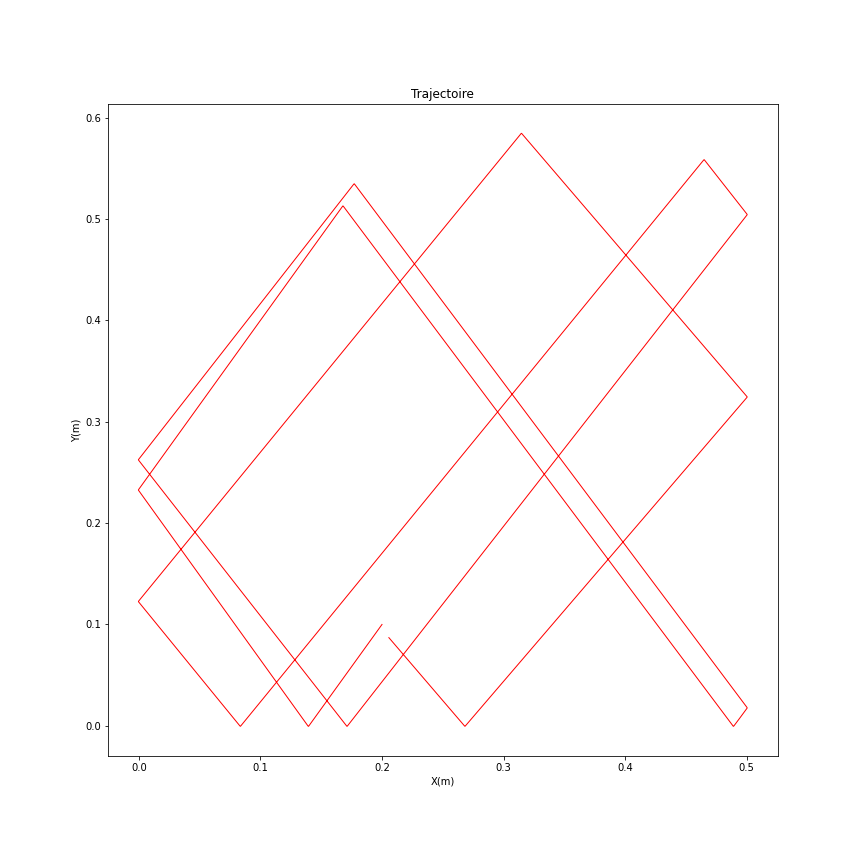

Text(0.5, 1.0, 'Trajectoire')

In [4]:
fig, ax1 = plt.subplots(figsize=(12, 12))
ax1.set_xlabel('X(m)')
ax1.set_ylabel('Y(m)')
ax1.plot(X, Y, color='red', lw=1)
ax1.set_title("Trajectoire")
#Tracé de plusieurs rectangles:

## Etape 4

Après la sortie de boucle, à partir des évolutions temporelles de Vx, Vy, X et Y, calculer les énergies cinétiques (selon les deux axes), potentielles de contact (selon les deux axes), et totale.


<IPython.core.display.Javascript object>


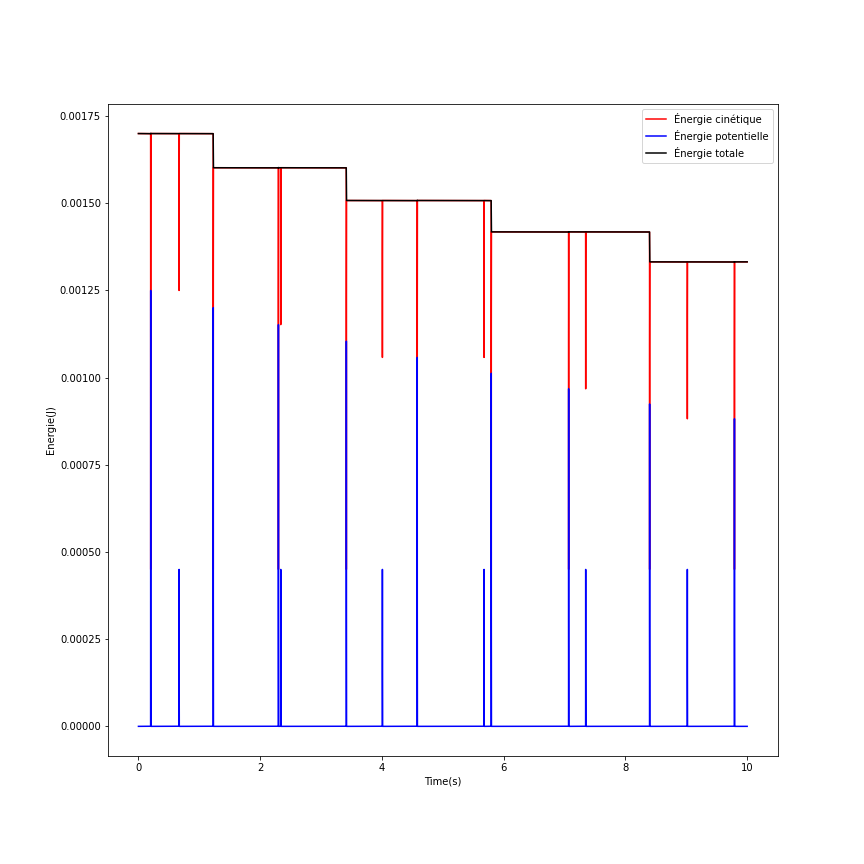

In [5]:
#Energie cinétique
Ec_x = 0.5 * m * Vx**2
Ec_y = 0.5 * m * Vy**2

#Energie potentielle
#Voir avant!

Ec = Ec_x + Ec_y
Ep = Ep_x + Ep_y
Et = Ec + Ep

fig, ax2 = plt.subplots(figsize=(12,12))
ax2.set_xlabel('Time(s)')
ax2.set_ylabel('Energie(J)')
ax2.plot(T, Ec, color='red', lw=1.5, label='Énergie cinétique')
ax2.plot(T, Ep, color='blue', lw=1.5, label='Énergie potentielle')
ax2.plot(T, Et, color='black', lw=1.5, label='Énergie totale', linestyle='-')
plt.legend()

## Etape 5

Créer un postprocesseur permettant de calculer l'évolution de la température et de la pression dans la boîte. Deux possibilités sont envisageables : 
1. Effectuer une moyenne mobile
2. Effectuer des moyennes par sous-intervalles de temps

Puisque vous êtes arrivé(e) jusque là, nous vous laissons explorer ces possibilités.

In [6]:
#Moyenne mobile:
IntervalleMobile = 10 #intervalle mobile
TemperatureMobile = np.zeros(N+1-IntervalleMobile+1)
PressionMobile = np.zeros(N+1-IntervalleMobile+1)
TempsMobile = np.zeros(N+1-IntervalleMobile+1)
for i in range (N+1-IntervalleMobile+1):
    #Température
    Ec_moy_cu = Ec[i:i+IntervalleMobile]
    TemperatureMobile[i] = np.mean(Ec_moy_cu)
    
    #Préssion
    Fx_moy_cu = np.mean(abs(Fx[i:i+IntervalleMobile]))
    Fy_moy_cu = np.mean(abs(Fy[i:i+IntervalleMobile]))
    Perimetre_moy_cu = np.mean(perimetre[i:i+IntervalleMobile])
    PressionMobile[i] = (Fx_moy_cu + Fy_moy_cu)/Perimetre_moy_cu
    
    #Nouveau temps:
    TempsMobile[i] = T[i]
    
#Sous-intervalles de temps:
SousIntervalle = 100 #100 dt et pas s'endetter
SousTemperature = np.zeros(N+1//SousIntervalle)
SousPression = np.zeros(N+1//SousIntervalle)
SousTemps = np.zeros(N+1//SousIntervalle)
j = 0 #incrément pour les nouveaux tableaux pressions et temperatures
for i in range(0, N+1+1, SousIntervalle):
    #Température
    Ec_moy_cu = Ec[i:i+SousIntervalle]
    SousTemperature[j] = np.mean(Ec_moy_cu)
    
    #Préssion
    Fx_moy_cu = np.mean(abs(Fx[i:i+SousIntervalle]))
    Fy_moy_cu = np.mean(abs(Fy[i:i+SousIntervalle]))
    Perimetre_moy_cu = np.mean(perimetre[i:i+SousIntervalle])
    SousPression[j] = (Fx_moy_cu + Fy_moy_cu)/Perimetre_moy_cu
    
    #Nouveau temps:
    SousTemps[j] = T[i]
    
    j += 1
    
print(TemperatureMobile[-2], PressionMobile[-2], SousTemperature[-2], SousPression[-2])

0.0013320006286991137 0.0 0.0 0.0


## Etape 6

Sorties graphiques : Tracer les variables Pression et Température en fonction du temps

<IPython.core.display.Javascript object>


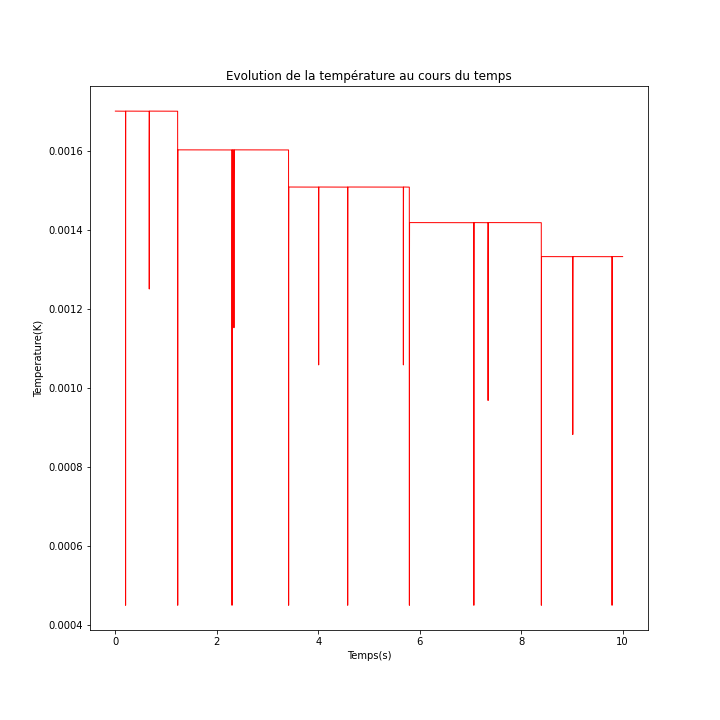

<IPython.core.display.Javascript object>


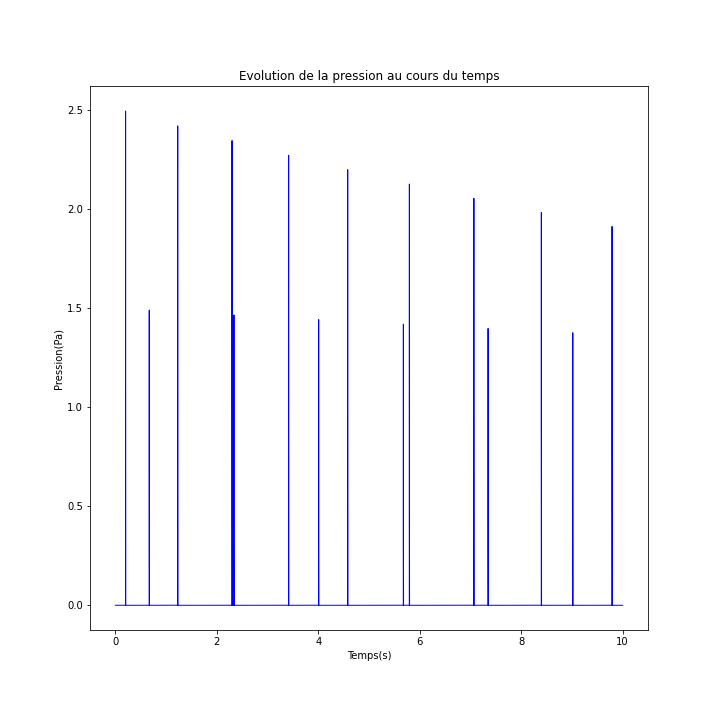

<IPython.core.display.Javascript object>


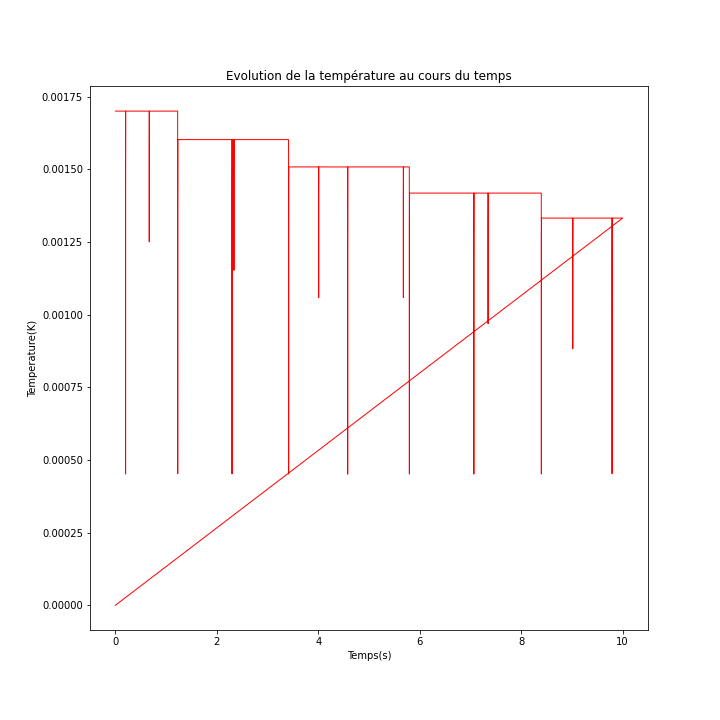

<IPython.core.display.Javascript object>


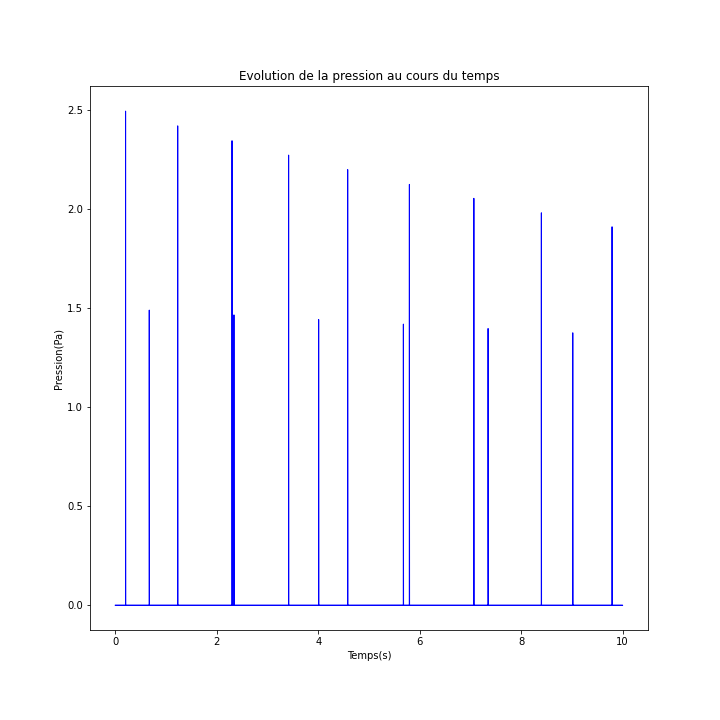

Text(0.5, 1.0, 'Evolution de la pression au cours du temps')

In [7]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.set_ylabel('Temperature(K)')
ax1.set_xlabel('Temps(s)')
ax1.plot(TempsMobile, TemperatureMobile, color='red', lw=1)
ax1.set_title("Evolution de la température au cours du temps")

fig2, ax2 = plt.subplots(figsize=(10, 10))
ax2.set_ylabel('Pression(Pa)')
ax2.set_xlabel('Temps(s)')
ax2.plot(TempsMobile, PressionMobile, color='blue', lw=1)
ax2.set_title("Evolution de la pression au cours du temps")

fig3, ax3 = plt.subplots(figsize=(10, 10))
ax3.set_ylabel('Temperature(K)')
ax3.set_xlabel('Temps(s)')
ax3.plot(SousTemps, SousTemperature, color='red', lw=1)
ax3.set_title("Evolution de la température au cours du temps")

fig4, ax4 = plt.subplots(figsize=(10, 10))
ax4.set_ylabel('Pression(Pa)')
ax4.set_xlabel('Temps(s)')
ax4.plot(SousTemps, SousPression, color='blue', lw=1)
ax4.set_title("Evolution de la pression au cours du temps")

## Etape 7

Commentez vos observations.

## Réponse :

(Votre réponse)

<IPython.core.display.Javascript object>


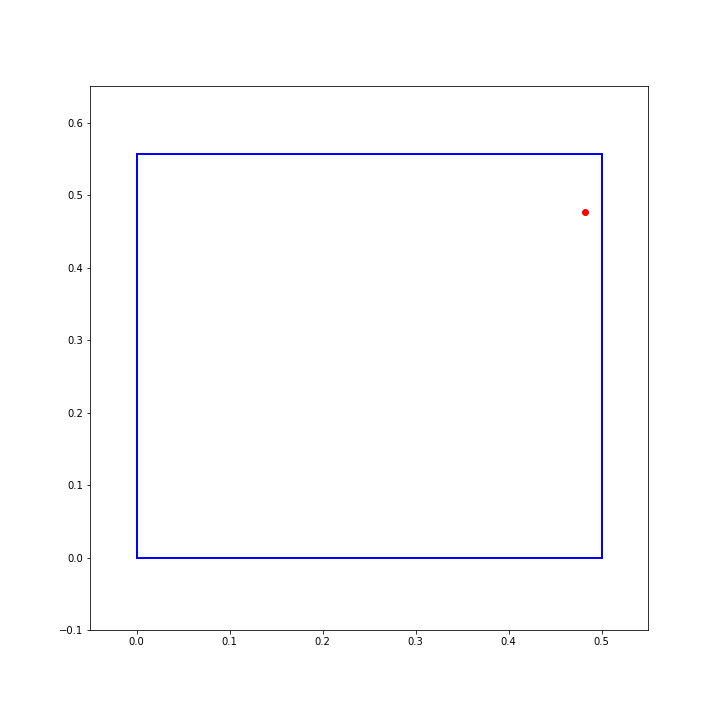

In [8]:
#Moi animation:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(xlim=(-0.05, Xmax+0.05), ylim=(-0.1, Ymax+0.05))

particule, = ax.plot([],[],'ro') 

#On accelere le baille:
coeff_acceleration = 1000
X_new = np.zeros(N+1//coeff_acceleration +1)
Y_new = np.zeros(N+1//coeff_acceleration +1)
perimetre_new = np.zeros(N+1//coeff_acceleration +1)
j = 0
for i in range(N+1):
    if i%coeff_acceleration == 0:
        X_new[j] = X[i]
        Y_new[j] = Y[i]
        perimetre_new[j] = perimetre[i]
        j+=1

X_new[-1] = X[-1]
Y_new[-1] = Y[-1]
perimetre_new[-1] = perimetre[-1]


#Rectangle:
valeur_ac_ymax = (1/2)*perimetre[0] + Xmin + Ymin - Xmax
rect = Rectangle((0, 0), Xmax, valeur_ac_ymax, linewidth=2, edgecolor='b', facecolor='none')
ax.add_patch(rect)
        
# fonction pour l'animation 
def anim_pendule(i):
    valeur_ac_ymax = (1/2)*perimetre_new[i] + Xmin + Ymin - Xmax
    rect.set_xy((Xmin, Ymin))
    rect.set_width(Xmax)
    rect.set_height(valeur_ac_ymax)
    particule.set_data([X_new[i],Y_new[i]])
    return particule, rect,


anim = animation.FuncAnimation(
    fig, anim_pendule, frames=N//coeff_acceleration +1, interval=10, blit=True)
plt.show()